In [32]:
import pandas as pd

# sesuaikan dengan nama file hasil upload
file_path = "/barubanget_with_status.csv"

# coba baca dengan encoding latin1 (lebih aman kalau ada karakter khusus)
df = pd.read_csv(file_path, sep=';', engine="python", encoding="latin1")

df.head()

Index    pH Temperatur (°C) Kadar Air (%) Kelembapan (%)   status
0      1  6,19            28,6          26,2             65       ok
1      2  6,54              39          25,1           78,9  warning
2      3  6,58            22,5          31,4           73,1       ok
3      4  6,27            22,2           7,3           66,4  warning
4      5  6,14            23,2          20,4           68,3       ok

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Pastikan kolom numerik jadi float
num_cols = ["pH", "Temperatur (°C)", "Kadar Air (%)", "Kelembapan (%)"]
for col in num_cols:
    # Replace comma with dot and convert to numeric
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Isi NaN dengan median, bukan drop semua
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Encode label 'status'
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])  # ok=1, warning=0 (misalnya)

# Cek distribusi label (penting biar tidak kosong)
print(df["status"].value_counts())

# Pisahkan fitur dan target
X = df[num_cols].values
y = df["status_encoded"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

status
ok         2930
warning    2070
Name: count, dtype: int64
Train shape: (4000, 4)
Test shape: (1000, 4)


In [34]:
# Pastikan kolom numerik terkonversi ke float
num_cols = ["pH", "Temperatur (°C)", "Kadar Air (%)", "Kelembapan (%)"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Pastikan tidak ada NaN
df = df.dropna()

# Encode label 'status' (ok / warning)
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])  # ok=1, warning=0 (biasanya)

# Pisahkan fitur (X) dan target (y)
X = df[num_cols].values
y = df["status_encoded"].values

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur (supaya ANN lebih stabil)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Buat model Sequential
model = Sequential()

# Tambahkan layer input (jumlah neuron = jumlah fitur)
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Tambahkan hidden layer
model.add(Dense(units=32, activation='relu'))

# Tambahkan layer output (1 neuron untuk klasifikasi biner)
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Cetak ringkasan model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7156 - loss: 0.5078 - val_accuracy: 0.9500 - val_loss: 0.1615
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9549 - loss: 0.1373 - val_accuracy: 0.9510 - val_loss: 0.1275
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1205 - val_accuracy: 0.9530 - val_loss: 0.1176
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9586 - loss: 0.1156 - val_accuracy: 0.9510 - val_loss: 0.1191
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9614 - loss: 0.1024 - val_accuracy: 0.9530 - val_loss: 0.1135
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.0991 - val_accuracy: 0.9470 - val_loss: 0.1179
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1047 - val_accuracy: 0.9520 - val_loss: 0.1227
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9591 - loss: 0.1052 - val_accuracy: 0.

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi probabilitas pada data testing
y_pred_prob = model.predict(X_test)

# Ubah probabilitas prediksi menjadi kelas biner (0 atau 1) dengan threshold 0.5
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Cetak confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

# Cetak classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[580   6]
 [ 26 388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       586
           1       0.98      0.94      0.96       414

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [38]:
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data and preprocess within this cell to ensure df is available
file_path = "/barubanget_with_status.csv"

# coba baca dengan encoding latin1 (lebih aman kalau ada karakter khusus)
df = pd.read_csv(file_path, sep=';', engine="python", encoding="latin1")

# Pastikan kolom numerik jadi float
num_cols = ["pH", "Temperatur (°C)", "Kadar Air (%)", "Kelembapan (%)"]
for col in num_cols:
    # Replace comma with dot and convert to numeric
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Isi NaN with median, bukan drop semua
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# Encode label 'status'
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])

# Separate features and target
X = df[num_cols].values
y = df["status_encoded"].values

# Split data and get the indices of the test set
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42, stratify=y
)

# Standarize features (important for ANN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assuming y_pred_binary is available from previous cells,
# and model is also available.

# Konversi label kelas biner yang diprediksi kembali ke label asli ('ok' atau 'warning')
y_pred_labels = le.inverse_transform(y_pred_binary.flatten())

# Konversi label asli data testing kembali ke label asli ('ok' atau 'warning')
y_test_labels = le.inverse_transform(y_test)


# Tampilkan beberapa contoh data testing beserta label asli dan label prediksi
print("\nPerbandingan Label Asli vs Prediksi:")
print("="*50)

# Ambil beberapa indeks acak dari data testing
sample_indices = random.sample(range(len(X_test)), 1000) # Reduced sample size for better display


for i in sample_indices:
    original_index_in_df = test_indices[i]
    print(f"Sample {i}:")
    # Access features from the original dataframe for display purposes
    print(f"  Fitur: pH={df.loc[original_index_in_df, 'pH']}, Temp={df.loc[original_index_in_df, 'Temperatur (°C)']}°C, "
          f"Air={df.loc[original_index_in_df, 'Kadar Air (%)']}%, Lembab={df.loc[original_index_in_df, 'Kelembapan (%)']}%")
    print(f"  Label Asli: {y_test_labels[i]}")
    print(f"  Label Prediksi: {y_pred_labels[i]}")
    print("-" * 5000)

Streaming output truncated to the last 5000 lines.
Sample 237:
  Fitur: pH=8.78, Temp=15.4°C, Air=14.1%, Lembab=37.3%
  Label Asli: warning
  Label Prediksi: warning
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
import pandas as pd
from google.colab import files
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load data and preprocess within this cell to ensure df is available
file_path = "/barubanget_with_status.csv"

# coba baca dengan encoding latin1 (lebih aman kalau ada karakter khusus)
df = pd.read_csv(file_path, sep=';', engine="python", encoding="latin1")

# Pastikan kolom numerik jadi float
num_cols = ["pH", "Temperatur (°C)", "Kadar Air (%)", "Kelembapan (%)"]
for col in num_cols:
    # Replace comma with dot and convert to numeric
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Isi NaN with median, bukan drop semua
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Encode label 'status'
le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df["status"])

# Separate features and target
X = df[num_cols].values
y = df["status_encoded"].values

# Assuming X_test, y_test, y_pred_binary, and model are available from previous cells.
# If not, you would need to include the train_test_split and model prediction steps here as well.

# Konversi label kelas biner yang diprediksi kembali ke label asli ('ok' atau 'warning')
y_pred_labels = le.inverse_transform(y_pred_binary.flatten())

# Konversi label asli data testing kembali ke label asli ('ok' atau 'warning')
y_test_labels = le.inverse_transform(y_test)

# Get the original indices of the test set
# This assumes that the y_test Series/array maintains the original index alignment.
# If not, the train_test_split should have returned the indices.
# Assuming y_test is a pandas Series or has an index:
if isinstance(y_test, pd.Series):
    test_original_indices = y_test.index.tolist()
# If y_test is a numpy array and you used train_test_split with return_indices=True:
# test_indices would be available from the split.
# For now, we will assume y_test is aligned with the original df indices for simplicity
# and use a range for sampling based on the length of y_test_labels.
sample_indices = random.sample(range(len(y_test_labels)), min(len(y_test_labels), 1000)) # Reduced sample size for better display


# Create DataFrame from prediction results
results_df = pd.DataFrame({
    "Features": [f"pH={df.loc[test_indices[i], 'pH']}, Temp={df.loc[test_indices[i], 'Temperatur (°C)']}°C, Air={df.loc[test_indices[i], 'Kadar Air (%)']}%, Lembab={df.loc[test_indices[i], 'Kelembapan (%)']}%" for i in sample_indices],
    "Label_Asli": [y_test_labels[i] for i in sample_indices],
    "Label_Prediksi": [y_pred_labels[i] for i in sample_indices]
})


# Simpan ke Excel
output_file = "hasil_prediksi.xlsx"
results_df.to_excel(output_file, index=False)

# Download otomatis ke PC/laptop
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Buat DataFrame sementara untuk menampilkan hasil dengan lebih mudah
results_df = pd.DataFrame({
    'Actual_Label': y_test_labels,
    'Predicted_Label': y_pred_labels
})

print("\nIndeks Data Testing dengan Label Asli dan Prediksi:")
print("="*60)

# Tampilkan indeks untuk data 'ok' (baik asli maupun prediksi)
print("\nData dengan Status 'ok':")
print("--------------------")
ok_indices = results_df[(results_df['Actual_Label'] == 'ok') | (results_df['Predicted_Label'] == 'ok')].index.tolist()
print(f"Jumlah data 'ok' (Asli atau Prediksi): {len(ok_indices)}")
print("Contoh indeks:", ok_indices[:20]) # Tampilkan beberapa contoh indeks

# Tampilkan indeks untuk data 'warning' (baik asli maupun prediksi)
print("\nData dengan Status 'warning':")
print("--------------------")
warning_indices = results_df[(results_df['Actual_Label'] == 'warning') | (results_df['Predicted_Label'] == 'warning')].index.tolist()
print(f"Jumlah data 'warning' (Asli atau Prediksi): {len(warning_indices)}")
print("Contoh indeks:", warning_indices[:20]) # Tampilkan beberapa contoh indeks

# Untuk melihat detail perbandingan, bisa difilter lebih lanjut
print("\nPerbandingan Detail (Contoh 10 Data):")
print("------------------------------------")
print(results_df.head(10))


Indeks Data Testing dengan Label Asli dan Prediksi:

Data dengan Status 'ok':
--------------------
Jumlah data 'ok' (Asli atau Prediksi): 830
Contoh indeks: [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

Data dengan Status 'warning':
--------------------
Jumlah data 'warning' (Asli atau Prediksi): 638
Contoh indeks: [0, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 17, 18, 19, 21, 24, 26, 30, 31, 32]

Perbandingan Detail (Contoh 10 Data):
------------------------------------
  Actual_Label Predicted_Label
0      warning              ok
1           ok              ok
2      warning         warning
3           ok         warning
4      warning         warning
5           ok              ok
6           ok         warning
7           ok              ok
8           ok              ok
9      warning              ok


In [41]:
# Evaluasi di test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Test: {acc*100:.2f}%")

# Prediksi
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Akurasi Test: 97.50%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

          ok       0.97      0.99      0.98       586
     warning       0.99      0.95      0.97       414

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.97      1000


Confusion Matrix:
[[581   5]
 [ 20 394]]


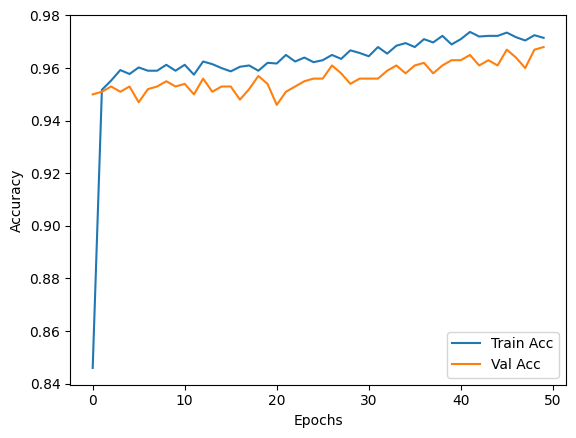

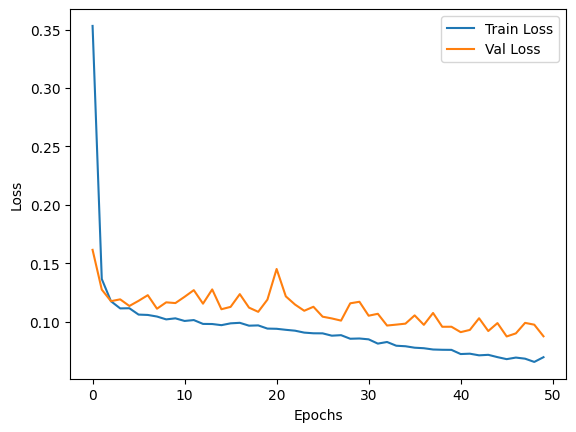

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

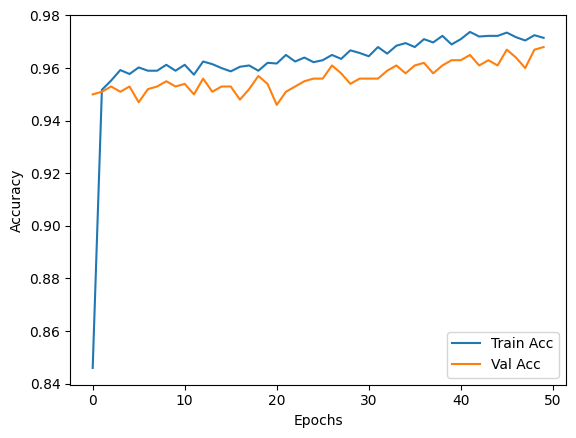

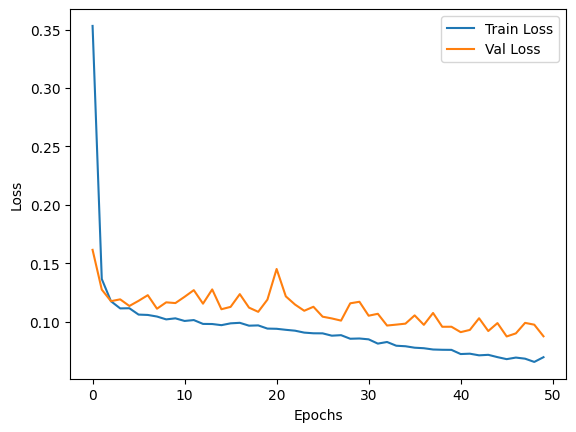

In [43]:
# Plot training & validation accuracy
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
